In [3]:
pip install praw

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\ramre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import praw
import pandas as pd
from praw.models import MoreComments
import datetime as dt

In [5]:
# myReddit = praw.Reddit("bot1")
myReddit = praw.Reddit(client_id = "_vdqTide0UmjdEmo2LA2aw",client_secret="Ion6way_O-aUWngXlM0QHU2sa170Mg",user_agent= "hehe")


In [6]:
count =0
fr =0;
parent = 0

Submission types

In [7]:
import requests as re

In [8]:

subrr = myReddit.subreddit("AITAH")

fullText = ""
for post in subrr.controversial(limit=10000):
    print(post.selftext)
    print()
    body = post.selftext
    body = "".join(body)
    fullText += body
textfile = open("D:\prog\hslab\\red.txt",'w') 

fullText = ascii(fullText)
# print(body)
textfile.write(fullText)
textfile.close()

My sister (Sue) lives in Austin, TX. I live with my boyfriend (Rob) about 45 minutes outside of Austin. I've been with him for over two years now. I love him, he's been so good for me. He's very kind to the people he cares about. He's very supportive. He's also a big softie. The problem is that I'm one of like 5 people that know this, because he's very introverted. If you don't know him, he comes of as aloof, even hostile. He's also much more conservative than myself and my circle of friends. This hasn't been much of an issue except with my sister. She's very liberal and very passionate about politics. 

Rob avoids Sue whenever he can help it. When we're going out, or she's coming over, he tries not to interact with her. They've had heated arguments in the past. Well, Sue always get heated. Rob doesn't really raise his voice or get mad when he argues. But he has this tendency to calmly talk to you like you're a child, if he's arguing with you. It drives Sue crazy and she's yelled at hi

In [9]:
keywords = {"husband","wife","brother","sister","stepbrother","stepsister","boyfriend","girlfriend","friend"}
parent = {"parent", "parents", "son", "daughter", "dad","mom","step father","step mother" }

In [10]:
total = ""
for post in subrr.top(limit = 1000):
    titles = post.title.split()
    for word in titles:
        for wor in keywords:
            if word == wor:
                # print(word)
                total += word
                total +=" "
        for rel in parent:
            if word == rel:
                # print("parents")
                total += "parents " 
# print(total)
file = open("D:\prog\hslab\\rels.txt",'w') 
total = ascii(total)
file.write(total)
file.close()
           


In [11]:
def getComments(post):
    comments = []
    for comment in post.comments:
        if type(comment) == MoreComments:
           continue
        comments.append(comment.body)
    return comments


In [12]:
import re
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [13]:
filename = "rels.txt"
infile = open(filename,'r',encoding='latin-1')
text = infile.read()
infile.close()

In [14]:
unrefinedStr = re.sub(r'\—|\'|\`|\"|\||\.|\*|\[|\{|\}|\(|\)|\]|\;|\:|\,|\^|\=|\-|\+|\_|\!|\?|\/|\>|\<|\&|\\|\#|\n', r' ', text) # removing special characters

In [15]:
tokens = unrefinedStr.split()

In [16]:
tokens = [myWord.lower() for myWord in tokens]

In [17]:
myStopWords = set(stopwords.words("english"))
print(len(myStopWords))
print(myStopWords)

179
{'against', "shan't", 'myself', 'been', "that'll", 'same', 'ours', 'then', 'before', 'was', 'too', 'wouldn', 'yourselves', 'with', 'it', 'his', 'itself', "hadn't", 'me', 'each', 'very', "mightn't", "she's", 'wasn', 'our', 'no', 'won', "aren't", "you're", 'this', 'we', 'who', 'hasn', 'them', "hasn't", 'only', 'between', 'from', 'of', "it's", 'once', 'after', 'other', 'will', 'yours', 'and', 'theirs', 'm', 'her', 'whom', 'that', "don't", 'further', "doesn't", 'don', 'few', 'own', 'some', 'has', 'y', 'needn', 'its', 'doing', 'be', 'didn', "shouldn't", 'a', 'to', 'shan', 'll', 'are', 'not', 'she', 'but', 'while', 'when', 'd', 'under', 'such', 'at', 'here', 'all', "haven't", 'he', 'which', "wasn't", 'weren', "mustn't", 'where', "isn't", 'haven', "you'd", 'o', 'than', 'were', 'about', 'why', 'your', 'mightn', 'the', "you'll", "won't", 'had', 'their', "weren't", 'into', 'yourself', 'off', 'out', 'ain', 'ourselves', "you've", 'shouldn', 're', "wouldn't", 'for', 'herself', 'over', 'just', '

In [18]:
Bag = []

# recall: "for word in tokens" does just as what is sounds in simple English. it goes through the array(list in python) and accesses word by word

for word in tokens:
    if word not in myStopWords and len(word)>2 and  word.isnumeric()==False:
        Bag.append(word)

In [19]:
SnowStem = SnowballStemmer('english')
Lemmatiser = WordNetLemmatizer()

In [20]:
StemBag = []
LemBag = []
for word in Bag:
    StemBag.append(SnowStem.stem(word))
    LemBag.append(Lemmatiser.lemmatize(word))

In [21]:
MyDict = {}
for word in StemBag:
    if word in MyDict.keys():
        MyDict[word] += 1
    else:
        MyDict[word] = 1

In [22]:
sortedDict = sorted(MyDict.items(), key=lambda x: x[1], reverse=True)
print(sortedDict[:20])

[('parent', 143), ('husband', 98), ('wife', 78), ('sister', 59), ('girlfriend', 38), ('friend', 37), ('boyfriend', 27), ('brother', 23), ('stepsist', 1)]


In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

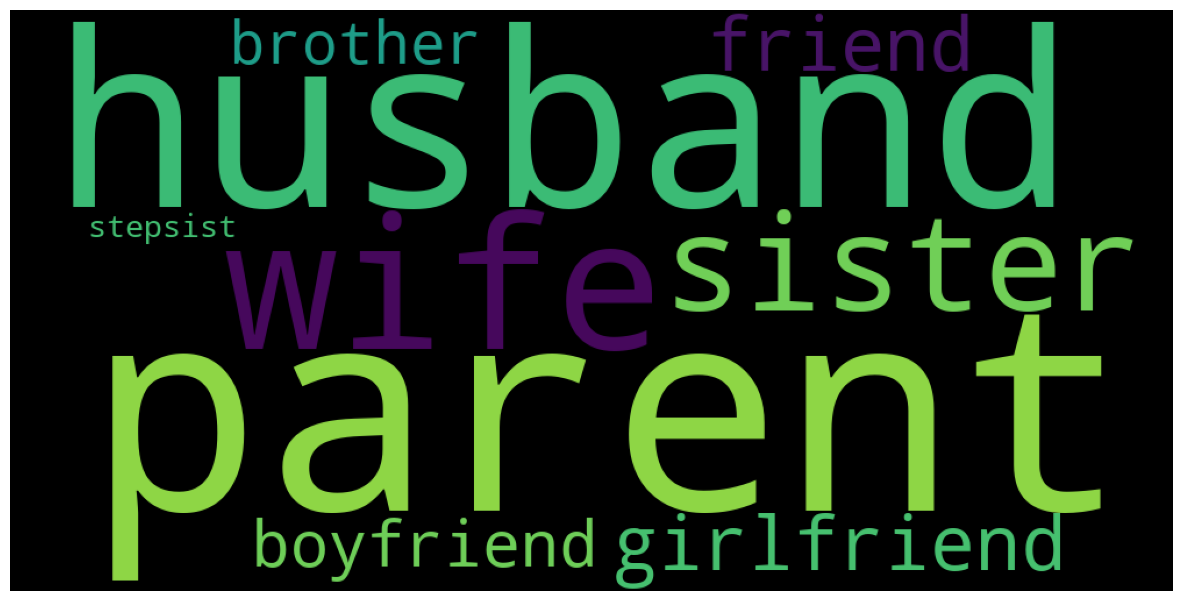

In [24]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(MyDict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
sortedDict = sorted(MyDict.items(), key=lambda x: x[1], reverse=True)
print(sortedDict[:100])

keyArr = [item[0] for item in sortedDict[:10]]
valArr = [item[1] for item in sortedDict[:10]]

[('parent', 143), ('husband', 98), ('wife', 78), ('sister', 59), ('girlfriend', 38), ('friend', 37), ('boyfriend', 27), ('brother', 23), ('stepsist', 1)]


<function matplotlib.pyplot.show(close=None, block=None)>

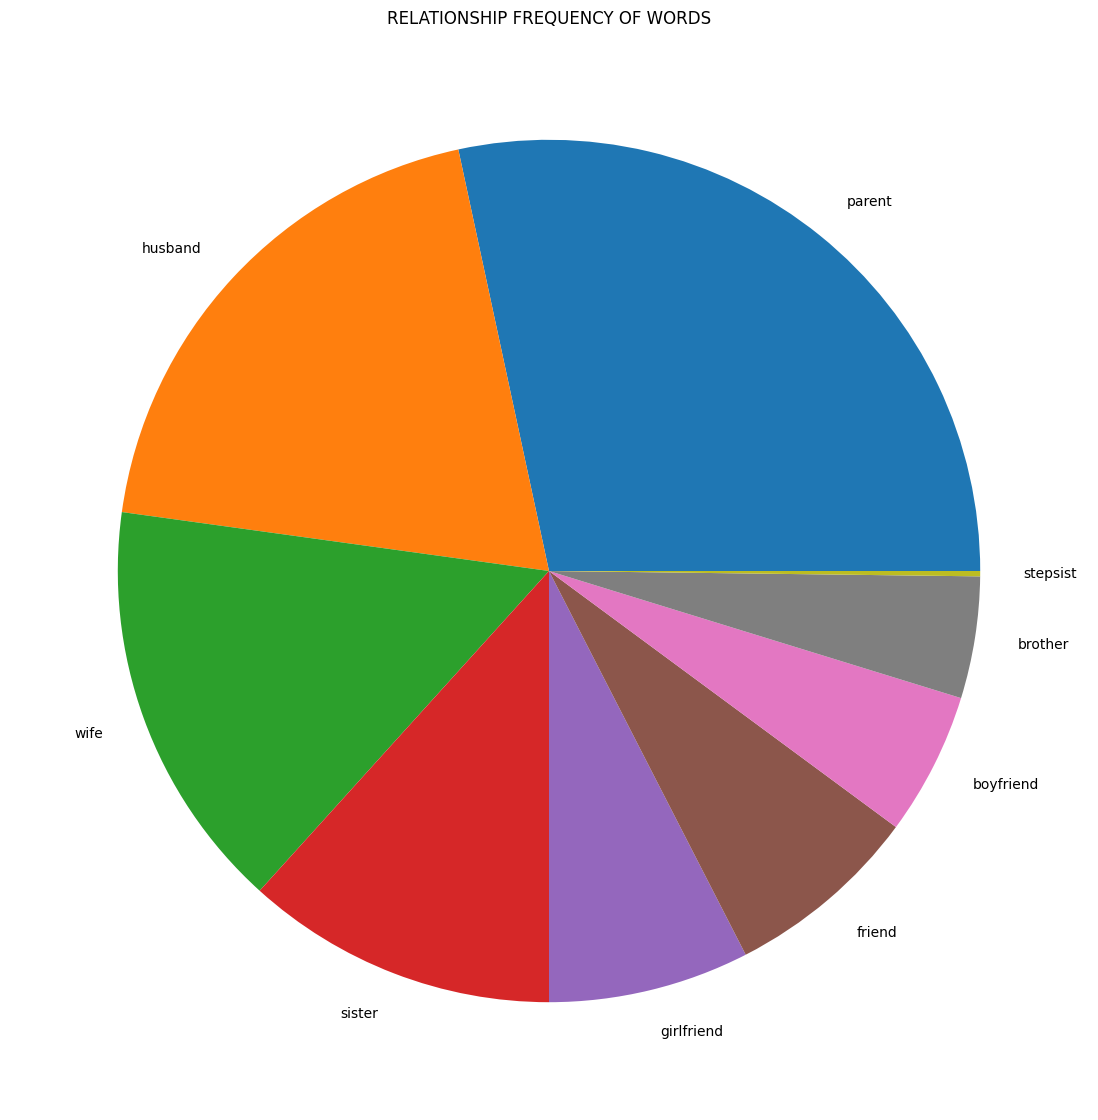

In [26]:
import matplotlib.pyplot as plt
keyArr = [item[0] for item in sortedDict[:20]]
valArr = [item[1] for item in sortedDict[:20]]
fig = plt.figure(figsize =(16,14))
plt.pie(valArr, labels = keyArr)
plt.title('RELATIONSHIP FREQUENCY OF WORDS')
plt.show